In [1]:
# Import commonly used libraries
import pandas
import numpy
import scipy
import scipy.stats
from ggplot import *
%matplotlib inline

In [2]:
# Create a DataFrame to store the turnstile and weather data.
allData = pandas.read_csv ("turnstile_data_master_with_weather.csv")

In [3]:
# Subdivide the data based on whether or not ir is raining
withRain = allData['ENTRIESn_hourly'][allData['rain'] == 1]
print 'With Rain Sample Size:', withRain.size
withoutRain = allData['ENTRIESn_hourly'][allData['rain'] == 0]
print 'Without Rain Sample Size:', withoutRain.size

With Rain Sample Size: 44104
Without Rain Sample Size: 87847


In [4]:
# Calculate the ridership mean on rainy days
print 'With Rain ENTRIESn_hourly Mean:', numpy.mean(withRain)
# Calculate the ridership mean on non rainy days
print 'Without Rain ENTRIESn_hourly Mean:', numpy.mean(withoutRain)

With Rain ENTRIESn_hourly Mean: 1105.44637675
Without Rain ENTRIESn_hourly Mean: 1090.27878015


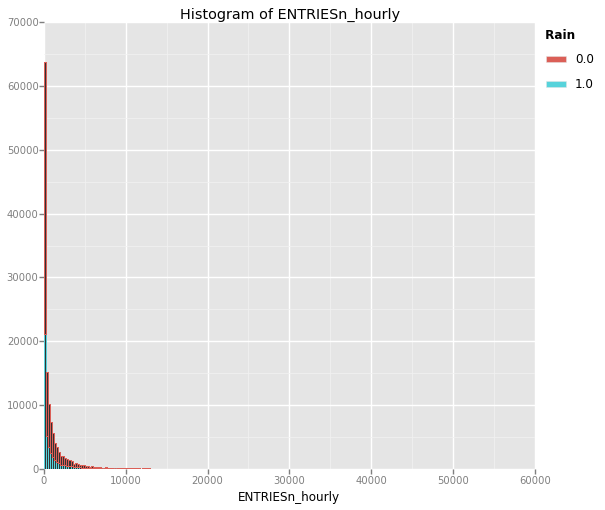

<ggplot: (4051435)>

In [7]:
# Is the data normal or non-normal?
# Normally, the Shapiro-Wilk test would be used to determine if the data
# is normal, but the test is not reliable on samples sizes greater than
# 5000.  So, a visual inspection of the data will be used to determine if
# the withRain and withoutRain data are normal using ggplot histogram.
ggplot(allData, aes(x='ENTRIESn_hourly', color='rain')) + \
    geom_histogram(binwidth=250) + \
    ggtitle('Histogram of ENTRIESn_hourly')


In [6]:
# As shown above, the histogram shows a non-normal distribution.
# The Mann Whiteney U Test is a non-parametric test suitable for 
# the non-normal data.

# Calculate the Mann Whitney U Test, 
# doubling the p-value to reflect a two-tailed test
(U, p) = scipy.stats.mannwhitneyu(withRain, withoutRain)
print 'The Mann-Whitney statistic =', U
print 'One-tailed p =', p
p = p * 2
print 'Two-tailed p =', p

# Test p to determine if we should accept or reject the hypothesis
if p < 0.05:
    print 'Reject the null Hypothesis'
else:
    print 'Accept the null Hypothesis'

The Mann-Whitney statistic = 1924409167.0
One-tailed p = 0.0193096344138
Two-tailed p = 0.0386192688276
Reject the null Hypothesis
